# Capstone Project

## Exploring Gender Wage Disparities

In this notebook I will be exploring the US Bureau of Labor and Statistics January 2015 report on income by gender and occupation. 

In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

## Inputing data, preliminary explore and data cleaning

In [494]:
genderwage = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/CapstoneProject/inc_occ_gender.csv')
genderwage.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


In [495]:
genderwage.describe()

,All_workers,M_workers,F_workers
count,558.000000,558.000000,558.000000
mean,586.458781,326.593190,259.831541
std,4758.979138,2654.600532,2142.551053
min,0.000000,0.000000,0.000000
25%,21.000000,11.000000,3.000000
50%,67.000000,33.500000,18.000000
75%,253.000000,121.750000,84.000000
max,109080.000000,60746.000000,48334.000000


In [496]:
genderwage.dtypes

Occupation     object
All_workers     int64
All_weekly     object
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object

In [497]:
genderwage.head(30)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
5,Advertising and promotions managers,55,1050,29,Na,26,Na
6,Marketing and sales managers,948,1462,570,1603,378,1258
7,Public relations and fundraising managers,59,1557,24,Na,35,Na
8,Administrative services managers,170,1191,96,1451,73,981
9,Computer and information systems managers,636,1728,466,1817,169,1563


In [498]:
genderwage[['All_weekly',
            'M_weekly',
            'F_weekly']] = genderwage[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

In [499]:
genderwage.dtypes

Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [500]:
genderwage.isnull().sum()

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [501]:
categories = [] 
for i in genderwage['Occupation']:
    if i.isupper()==True:
        categories.append(i)

In [502]:
categories_df = genderwage.loc[genderwage['Occupation'].isin(categories)].reset_index(drop=True)


In [503]:
indices =[]
category_index = pd.Index(list(genderwage['Occupation']))
for i in categories:
    index = category_index.get_loc(i)
    indices.append(index)

In [504]:
indices

[0,
 1,
 32,
 61,
 78,
 100,
 124,
 133,
 139,
 151,
 171,
 205,
 217,
 236,
 250,
 257,
 278,
 297,
 350,
 360,
 401,
 439,
 521]

In [505]:
genderwage.insert(1, 'Occupation_Category', 0)

In [548]:
cat_count = -1
index_copy = pd.Index(list(genderwage['Occupation']))
for x in genderwage['Occupation']:
    current_index = index_copy.get_loc(x)
    genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category')] = cat_count
    if x.isupper():
        cat_count = cat_count + 1
        genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category')] = cat_count
    

In [550]:
genderwage.head(40)

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,1,823,1260.0,621,1347.0,202,1002.0
4,Legislators,1,8,NaN,5,NaN,4,NaN
5,Advertising and promotions managers,1,55,1050.0,29,NaN,26,NaN
6,Marketing and sales managers,1,948,1462.0,570,1603.0,378,1258.0
7,Public relations and fundraising managers,1,59,1557.0,24,NaN,35,NaN
8,Administrative services managers,1,170,1191.0,96,1451.0,73,981.0
9,Computer and information systems managers,1,636,1728.0,466,1817.0,169,1563.0


In [457]:
# this is so ugly (crying emoji)
# this is taking too long, am doing it ugly to get it done

#genderwage.iloc[1:32, genderwage.columns.get_loc('Occupation_Category')] = 1
#genderwage.iloc[32:61, genderwage.columns.get_loc('Occupation_Category')] = 2
#genderwage.iloc[61:78, genderwage.columns.get_loc('Occupation_Category')] = 3
#genderwage.iloc[78:100, genderwage.columns.get_loc('Occupation_Category')] = 4
#genderwage.iloc[100:124, genderwage.columns.get_loc('Occupation_Category')] = 5
#genderwage.iloc[124:133, genderwage.columns.get_loc('Occupation_Category')] = 6
#genderwage.iloc[133:139, genderwage.columns.get_loc('Occupation_Category')] = 7
#genderwage.iloc[139:151, genderwage.columns.get_loc('Occupation_Category')] = 8
#genderwage.iloc[151:171, genderwage.columns.get_loc('Occupation_Category')] = 9
#genderwage.iloc[171:205, genderwage.columns.get_loc('Occupation_Category')] = 10
#genderwage.iloc[205:217, genderwage.columns.get_loc('Occupation_Category')] = 11
#genderwage.iloc[217:239, genderwage.columns.get_loc('Occupation_Category')] = 12
#genderwage.iloc[239:250, genderwage.columns.get_loc('Occupation_Category')] = 13
#genderwage.iloc[250:257, genderwage.columns.get_loc('Occupation_Category')] = 14
#genderwage.iloc[257:278, genderwage.columns.get_loc('Occupation_Category')] = 15
#genderwage.iloc[278:297, genderwage.columns.get_loc('Occupation_Category')] = 16
#genderwage.iloc[297:350, genderwage.columns.get_loc('Occupation_Category')] = 17
#genderwage.iloc[350:360, genderwage.columns.get_loc('Occupation_Category')] = 18
#genderwage.iloc[360:401, genderwage.columns.get_loc('Occupation_Category')] = 19
#genderwage.iloc[401:439, genderwage.columns.get_loc('Occupation_Category')] = 20
#genderwage.iloc[439:521, genderwage.columns.get_loc('Occupation_Category')] = 21
#genderwage.iloc[521:, genderwage.columns.get_loc('Occupation_Category')] = 22


In [509]:
no_wage_df = genderwage.where(genderwage['F_weekly'].isnull())
no_wage_df.head(10) # why do you have nan values?!

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Legislators,0.0,8.0,NaN,5.0,NaN,4.0,NaN
5,Advertising and promotions managers,0.0,55.0,1050.0,29.0,NaN,26.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Public relations and fundraising managers,0.0,59.0,1557.0,24.0,NaN,35.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
no_wage_df.isnull().sum()

Occupation             192
Occupation_Category    192
All_workers            192
All_weekly             428
M_workers              192
M_weekly               468
F_workers              192
F_weekly               558
dtype: int64

In [511]:
no_wage_df = no_wage_df.dropna(axis=0, how='all')
no_wage_df.isnull().sum()

Occupation               0
Occupation_Category      0
All_workers              0
All_weekly             236
M_workers                0
M_weekly               276
F_workers                0
F_weekly               366
dtype: int64

In [512]:
no_wage_df.describe()

,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,366.0,366.000000,130.000000,366.000000,90.000000,366.000000,0.0
mean,0.0,69.699454,953.753846,58.896175,979.266667,10.795082,NaN
std,0.0,128.537814,355.417258,124.705396,376.822874,12.813908,NaN
min,0.0,0.000000,354.000000,0.000000,389.000000,0.000000,NaN
25%,0.0,11.000000,685.500000,7.000000,725.250000,1.000000,NaN
50%,0.0,30.000000,874.500000,20.000000,879.500000,5.000000,NaN
75%,0.0,67.000000,1152.500000,49.000000,1103.250000,17.000000,NaN
max,0.0,1181.000000,1952.000000,1155.000000,1892.000000,49.000000,NaN


In [513]:
cleanedgenderwage = genderwage.dropna(axis=0, how='any')

In [514]:
cleanedgenderwage.describe()

,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.781690,2065.781690,921.098592,1122.471831,1017.535211,943.260563,827.471831
std,4.870109,9298.336804,368.672668,5190.515099,411.970023,4182.313327,323.042686
min,0.000000,108.000000,391.000000,53.000000,401.000000,50.000000,380.000000
25%,0.000000,253.250000,619.250000,108.250000,675.000000,107.000000,566.750000
50%,0.000000,560.500000,898.500000,278.000000,992.500000,201.500000,773.500000
75%,0.000000,1294.500000,1162.500000,620.250000,1343.750000,551.250000,1021.000000
max,22.000000,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000


In [515]:
cleanedgenderwage.head()

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,0,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,0,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,0,948,1462.0,570,1603.0,378,1258.0


In [516]:
genderwage.head()

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,0,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,0,823,1260.0,621,1347.0,202,1002.0
4,Legislators,0,8,NaN,5,NaN,4,NaN


In [517]:
categories

['ALL OCCUPATIONS',
 'MANAGEMENT',
 'BUSINESS',
 'COMPUTATIONAL',
 'ENGINEERING',
 'SCIENCE',
 'SOCIAL SERVICE',
 'LEGAL',
 'EDUCATION',
 'ARTS',
 'HEALTHCARE PROFESSIONAL',
 'HEALTHCARE SUPPORT',
 'PROTECTIVE SERVICE',
 'CULINARY',
 'GROUNDSKEEPING',
 'SERVICE',
 'SALES',
 'OFFICE',
 'AGRICULTURAL',
 'CONSTRUCTION',
 'MAINTENANCE',
 'PRODUCTION',
 'TRANSPORTATION']

## Preliminary Data Exploration

Looking at distribution plots for our current features

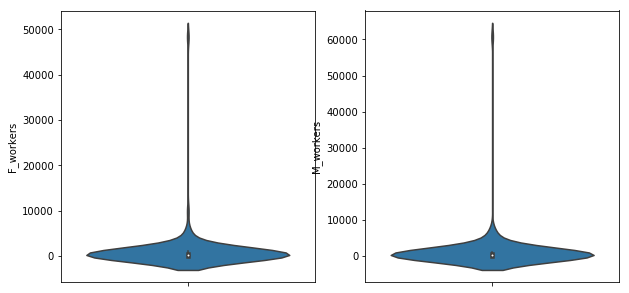

In [518]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.violinplot(x='F_workers', data=cleanedgenderwage, orient='v')
plt.subplot(1, 2, 2)
sns.violinplot(x='M_workers', data=cleanedgenderwage, orient='v')
plt.show()

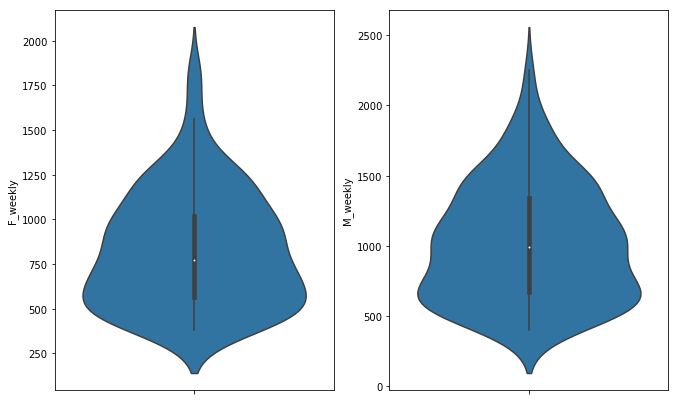

In [519]:
plt.figure(figsize=(11, 7))
plt.subplot(1, 2, 1)
sns.violinplot(x='F_weekly', data=cleanedgenderwage, orient='v')
plt.subplot(1, 2, 2)
sns.violinplot(x='M_weekly', data=cleanedgenderwage, orient='v')
plt.show()

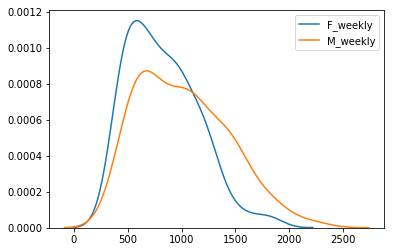

In [520]:
sns.kdeplot(data=cleanedgenderwage['F_weekly'])
sns.kdeplot(data=cleanedgenderwage['M_weekly'])
plt.show()

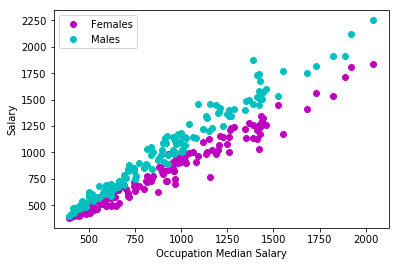

In [521]:
# look at female wages vs male wages on a scatter plot
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['F_weekly'], 'o', color='m')
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.legend(['Females','Males'])
plt.ylabel('Salary')
plt.show()

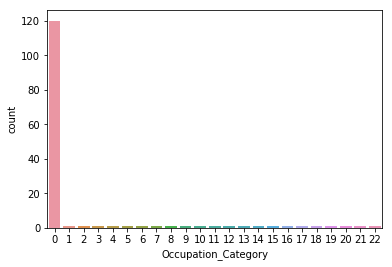

In [522]:
sns.countplot(x='Occupation_Category', data=cleanedgenderwage)
plt.show()

## Now lets create some features

Woo!

In [523]:
# see weekly female wage as ratio to mens wage
cleanedgenderwage['WageGap_as_Ratio'] = cleanedgenderwage['F_weekly'] / cleanedgenderwage['M_weekly']

# see ratio of women to men
cleanedgenderwage['GenderRatio'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['M_workers']

# check for count difference between All workers and M+F workers
cleanedgenderwage['All_Workers_Difference'] = cleanedgenderwage['All_workers'] - (cleanedgenderwage['M_workers'] + cleanedgenderwage['F_workers'])

# see female share of workers and complentary male share
cleanedgenderwage['F_share'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['All_workers']
cleanedgenderwage['M_share'] = cleanedgenderwage['M_workers'] / cleanedgenderwage['All_workers']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [524]:
def male_dom(x):
    if x > .85:
        return 0
    return 1

cleanedgenderwage['Male_Dominated'] = cleanedgenderwage['GenderRatio'].apply(male_dom)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [525]:
# a significant wage gap is 15% difference or more between womens wages compared to mens

cleanedgenderwage['Significant_wage_gap'] = np.where(cleanedgenderwage['WageGap_as_Ratio'] > .85, 0, 1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [526]:
# same features, just in the categories dataframe
categories_df[['All_weekly',
            'M_weekly',
            'F_weekly']] = categories_df[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

categories_df['WageRatio'] = categories_df['F_weekly'] / categories_df['M_weekly']
categories_df['GenderRatio'] = categories_df['F_workers'] / categories_df['M_workers']
categories_df['WageGap'] = categories_df['M_weekly'] - categories_df['F_weekly']
categories_df['F_share'] = categories_df['F_workers'] / categories_df['All_workers']
categories_df['M_share'] = categories_df['M_workers'] / categories_df['All_workers']
categories_df['All_Workers_Difference'] = categories_df['All_workers'] - (categories_df['M_workers'] + categories_df['F_workers'])


categories_df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageRatio,GenderRatio,WageGap,F_share,M_share,All_Workers_Difference
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173,0.795674,169.0,0.443106,0.556894,0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487,0.701991,347.0,0.412420,0.587500,1
2,BUSINESS,5942,1137.0,2686,1327.0,3256,1004.0,0.756594,1.212211,323.0,0.547964,0.452036,0
3,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0,0.828343,0.320487,258.0,0.242704,0.757296,0
4,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,0.865702,0.168574,195.0,0.144202,0.855422,1


## Lets plot some of these new features
Looking at bar plots of weekly income by occupation, wage gap by occupation, gender ratio by occupation, wage ratio by occupation, and a scatter plot of mens weekly income and womens weekly income as a function of the reported occupation median income.

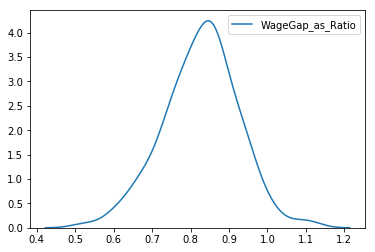

In [527]:
sns.kdeplot(data=cleanedgenderwage['WageGap_as_Ratio'])

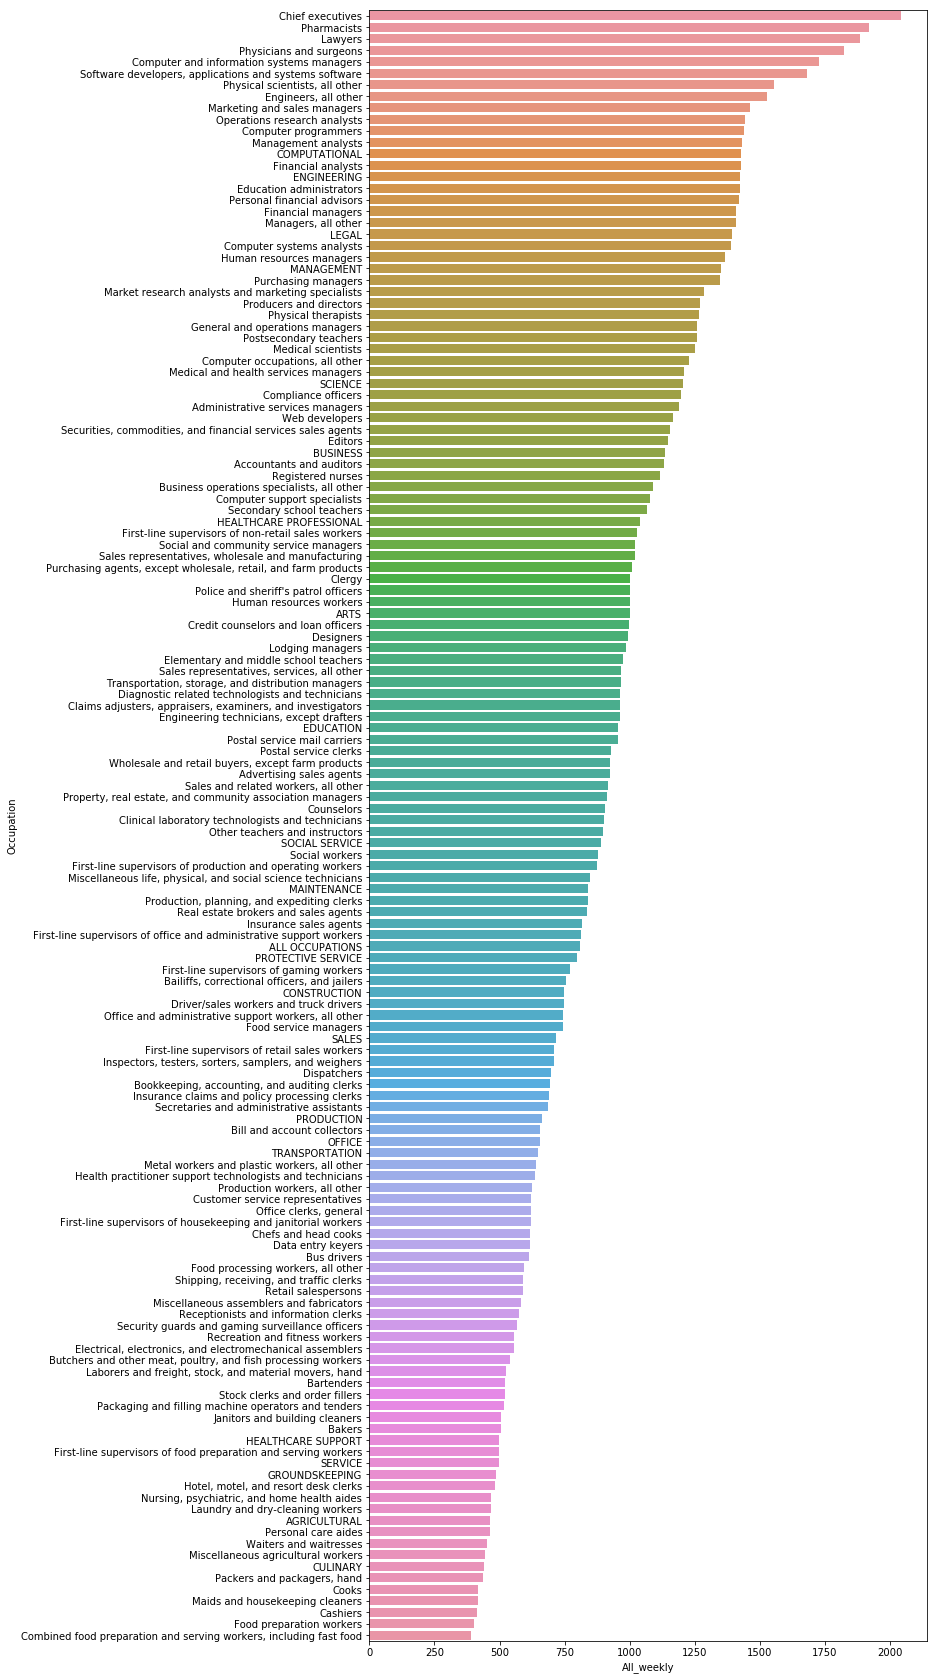

In [528]:
plt.figure(figsize=((10,30)))
sns.barplot(x='All_weekly',
            y='Occupation',
            data=cleanedgenderwage.sort_values('All_weekly', ascending=False))
plt.show()

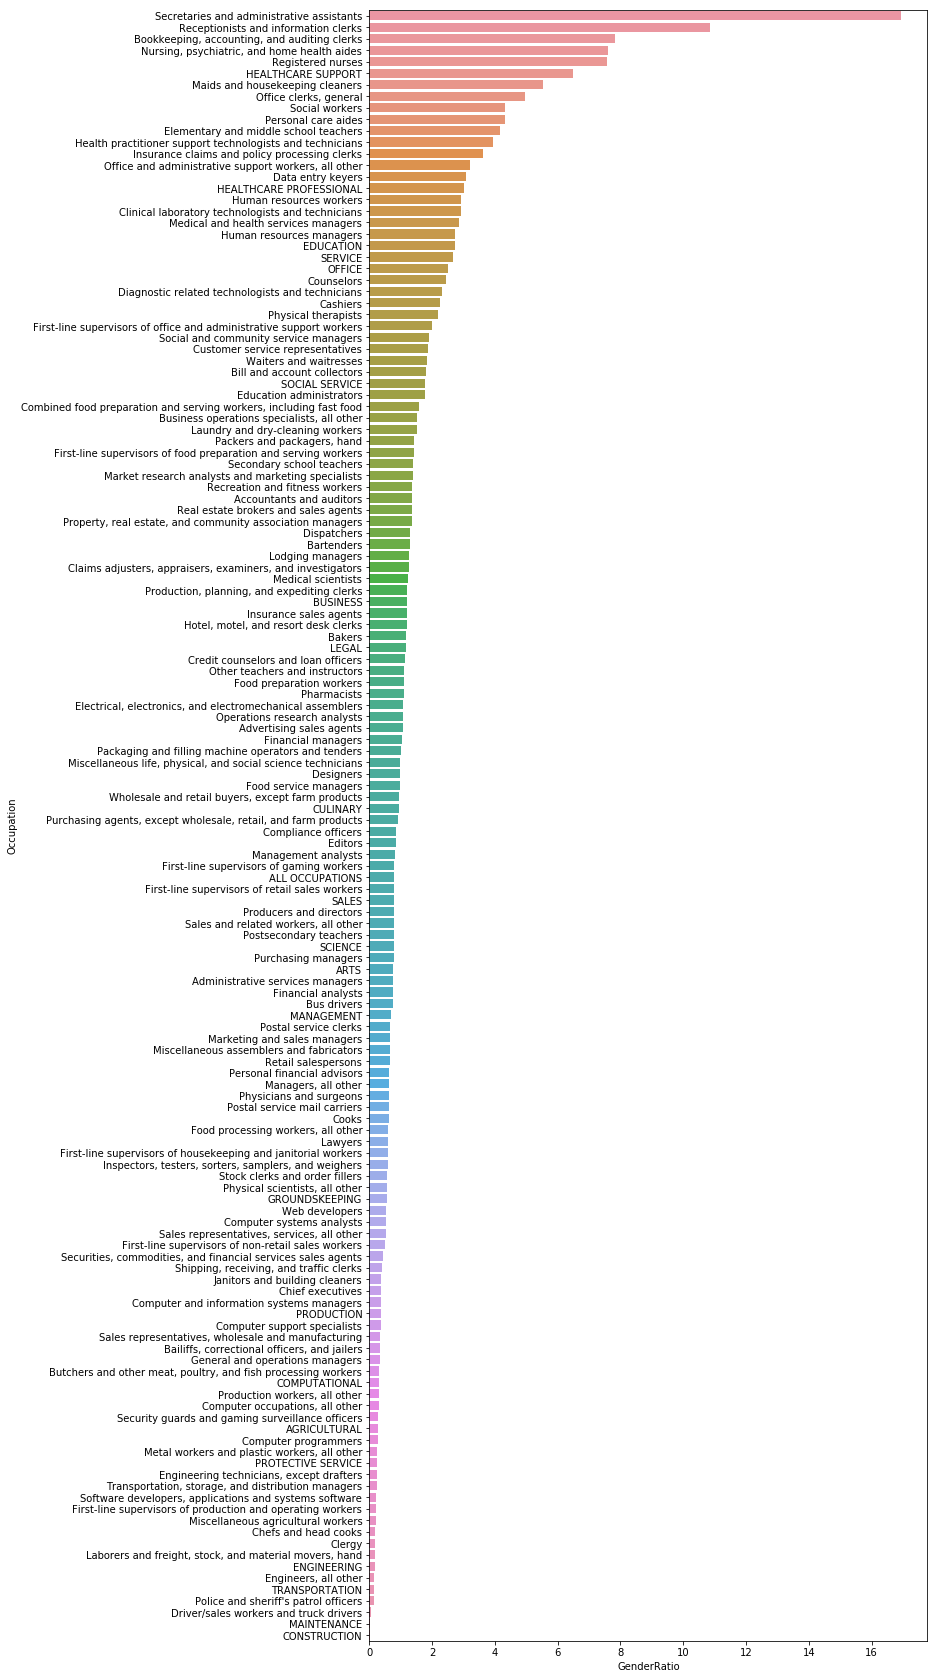

In [529]:
# Now lets look at the ratio of workers
plt.figure(figsize=((10,30)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('GenderRatio', ascending=False))
plt.show()

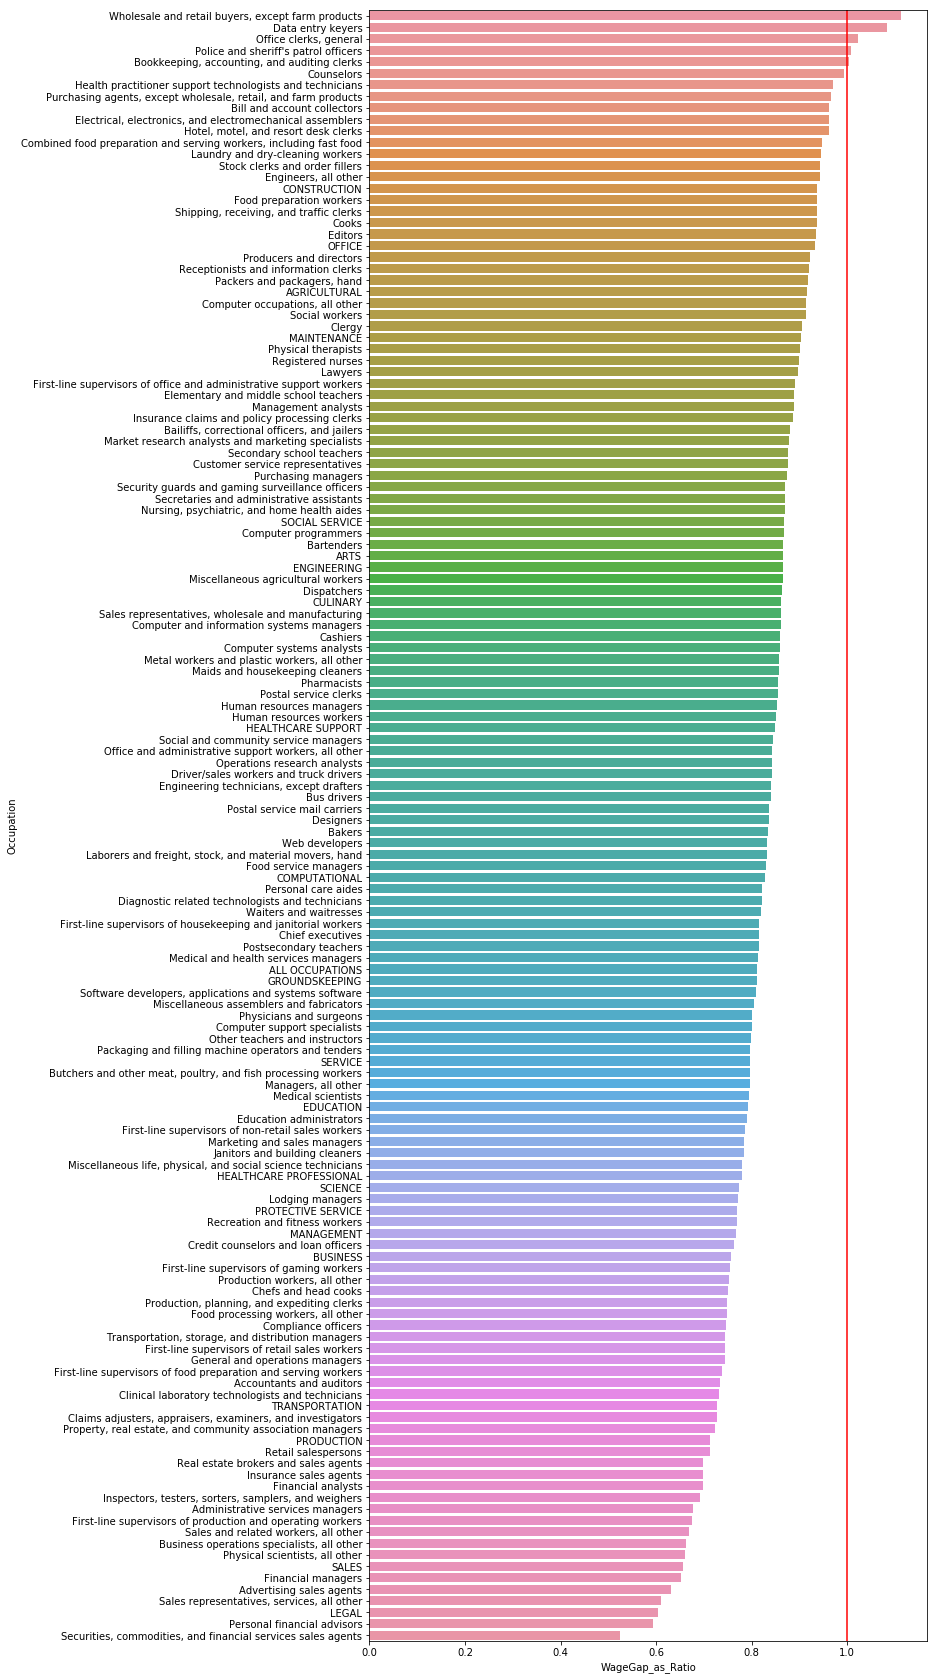

In [530]:
# Look at wage ratio by occupation
plt.figure(figsize=((10,30)))
sns.barplot(x='WageGap_as_Ratio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('WageGap_as_Ratio', ascending=False))
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

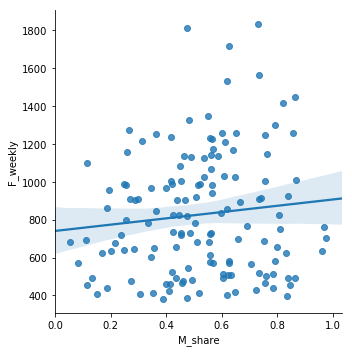

In [531]:
sns.lmplot(x='M_share', y='F_weekly', data=cleanedgenderwage)
plt.show()

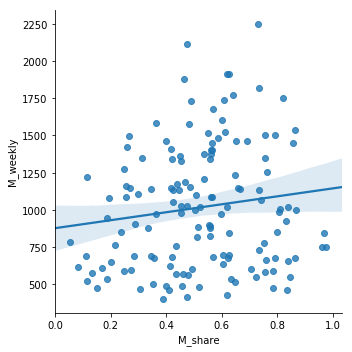

In [532]:
# lmplot of male wages vs male share
sns.lmplot(x='M_share', y='M_weekly', data=cleanedgenderwage)
plt.show()

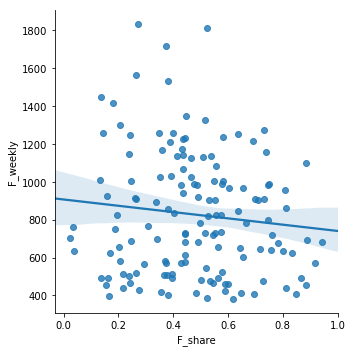

In [533]:
# lmplot of female wages vs female share
sns.lmplot(x='F_share', y='F_weekly', data=cleanedgenderwage)
plt.show() # looks like as women take over a field, it just pays less -.- 

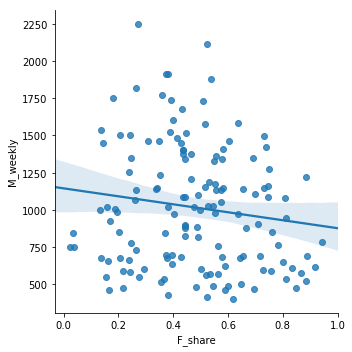

In [534]:
# lmplot of Male wages vs female share
sns.lmplot(x='F_share', y='M_weekly', data=cleanedgenderwage)
plt.show() 

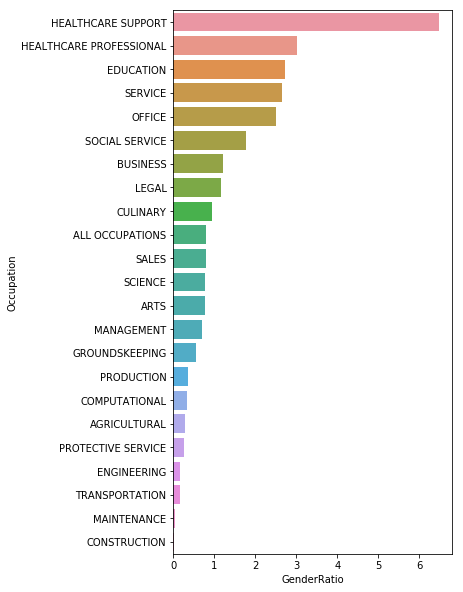

In [535]:
# Lets look at the gender ratio for just the occupational categories

plt.figure(figsize=((5,10)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=categories_df.sort_values('GenderRatio', ascending=False))
plt.show()

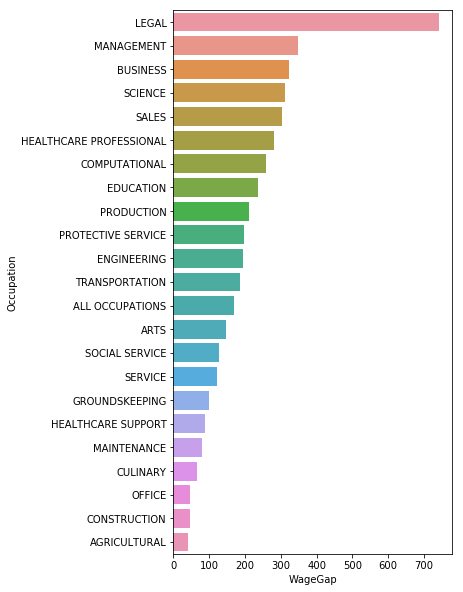

In [536]:
# Now lets see the wage gap
plt.figure(figsize=((5,10)))
sns.barplot(x='WageGap',
            y='Occupation',
            data=categories_df.sort_values('WageGap', ascending=False))
plt.show()

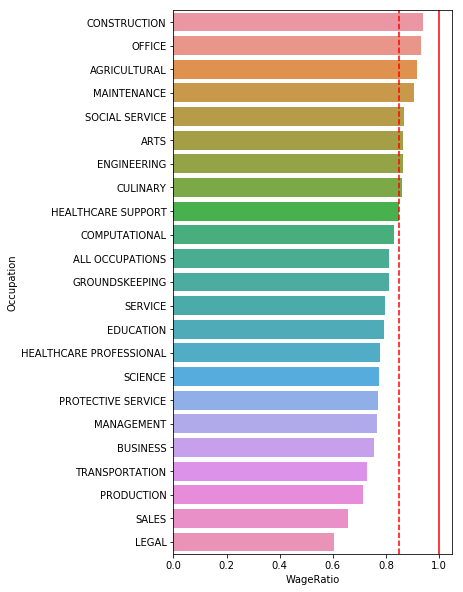

In [537]:
# Looking at wage ratios for men v women
# Red line indicates equal to mens wages, dashed line is 15% less 
plt.figure(figsize=((5,10)))
sns.barplot(x='WageRatio',
            y='Occupation',
            data=categories_df.sort_values('WageRatio', ascending=False))
plt.axvline(x=.85, color='red', linestyle='dashed')
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

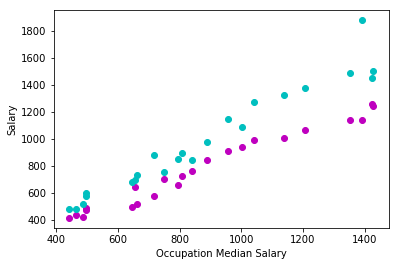

In [538]:
# Mens vs Womens salaries
plt.plot(categories_df['All_weekly'], categories_df['F_weekly'], 'o', color='m')
plt.plot(categories_df['All_weekly'], categories_df['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.ylabel('Salary')
plt.show()

In [539]:
# make occupational category feature here

In [540]:
# plot wages color coded to occupational category here
# do subplot with small plot for each category

# Time for some MODELS

we will be reviewing linear or logisitic regression classifier, then lasso regression classifier, then a random forest classifier

In [541]:
# set up training and testing sets, fit model, score model
def model_testing(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scored_model_train = model.score(X_train, y_train)
    scored_model_test = model.score(X_test, y_test)
    print("Model Score with Training data:")
    print(scored_model_train)
    print("Model Score with Testing data:")
    print(scored_model_test)
    print("")

In [542]:
# scale columns here

In [543]:
# set up x and y variables
X = cleanedgenderwage.drop(['Significant_wage_gap', 'Occupation', 'WageGap'], axis=1)
y = cleanedgenderwage['Significant_wage_gap']

ValueError: labels ['WageGap'] not contained in axis

In [ ]:
# Linear/logisitic Regression here
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
model_testing(logr, X, y, .35)

In [ ]:
# Lasso Regression classifier here
lasso = linear_model.Lasso()

In [ ]:
model_testing(lasso, X, y, .35)

In [ ]:
# Random Forest Classifier here
forest = ensemble.RandomForestClassifier(n_estimators=500, max_depth=2)

In [ ]:
model_testing(forest, X, y, .35)

In [ ]:
# Put hyper parameter adjustment here
c_range = [.01, .5, 1, 5, 10, 20]

for c in c_range:
    

In [ ]:
# Put model validation here

# Put conclusion here